In [1]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Context 
A common risk control method that banks and generally the financial industry use is credit score cards . Personal information and data are extracted by people's applications , to be used in prediction models for the likelyhood of future defaults and credit card borrowins , based on that the bank is able to make more accurate decisions on issuing credit cards to the applicants . 

So in the context of a course in Big Data , in AUEB Management Science and Technology we will use a dataset we extracted from [Kaggle](https://www.kaggle.com/rikdifos/credit-card-approval-prediction) to build such predictive models . 

**Iliadis Viktoras Giannis Vagionakis Andreas Sofos**

## ETL Process

We read the files the files we extracted from the [Credit Card Approval Prediction Kaggle Dataset](https://www.kaggle.com/rikdifos/credit-card-approval-prediction)  with the help of .read_csv from pandas . 
The data is only in csv format , 

### Extraction  and Data Overview

In [2]:
ApplicationDF = pd.read_csv("Bank Data/application_record.csv")
CreditDF =  pd.read_csv("Bank Data/credit_record.csv")

### Application Table Context and Explanation
| Feature name        | Explanation              |
|---------------------|--------------------------|
| ID                  | Client number            |
| CODE_GENDER         | Gender                   |
| FLAG_OWN_CAR        | Is there a car           |
| FLAG_OWN_REALTY     | Is there a property      |
| CNT_CHILDREN        | Number of children       |
| AMT_INCOME_TOTAL    | Annual income            |
| NAME_INCOME_TYPE    | Income category          |
| NAME_EDUCATION_TYPE | Education level          |
| NAME_FAMILY_STATUS  | Marital status           |
| NAME_HOUSING_TYPE   | Way of living            |
| DAYS_BIRTH          | Birthday                 |
| DAYS_EMPLOYED       | Start date of employment |
| FLAG_MOBIL          | Is there a mobile phone  |
| FLAG_WORK_PHONE     | Is there a work phone    |
| FLAG_PHONE          | Is there a phone         |
| FLAG_EMAIL          | Is there an email        |
| OCCUPATION_TYPE     | Occupation               |
| CNT_FAM_MEMBERS     | Family size              |

##### Note 

* On **DAYS_BIRTH**
Count backwards from current day (0), -1 means yesterday
* On **DAYS_EMPLOYED**
Count backwards from current day(0). If positive, it means the person currently unemployed.


In [3]:
print(ApplicationDF.shape)
print(ApplicationDF.dtypes)
ApplicationDF.head(10)

(438557, 18)
ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


### Credit Table Context and Explanation

| Feature name   | Explanation   |
|----------------|---------------|
| ID             | Client number |
| Months Balance | Record Month  |
| STATUS         | Status        |

* On **MONTHS_BALANCE**
The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on
* On **STATUS**
0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

In [4]:
print(CreditDF.shape)
print(CreditDF.dtypes)
CreditDF.head(10)

(1048575, 3)
ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


### Transformation - Application and Credit Data

Let's start with the Application dataset starting with checking for missing data . 

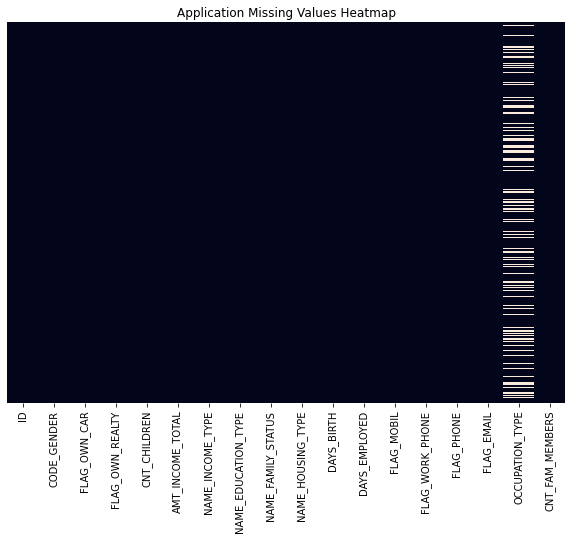

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64


In [5]:
#set figure size
plt.figure(figsize=(10,7))
#generate heatmap
sns.heatmap(ApplicationDF.isnull(), cbar=False)
#labels and titles
plt.title("Application Missing Values Heatmap")
plt.yticks([])
plt.show()
print(ApplicationDF.isnull().sum())

**We can see that the occupation type  has an enormous amount of missing values so we thought that it was best to drop the column entirely ( 31% of column was Null) and not fill it with the AVG values or something else.**

In [6]:
ApplicationDF = ApplicationDF.drop(columns=['OCCUPATION_TYPE'])

Now Lets check for missing values in the Credit DF 

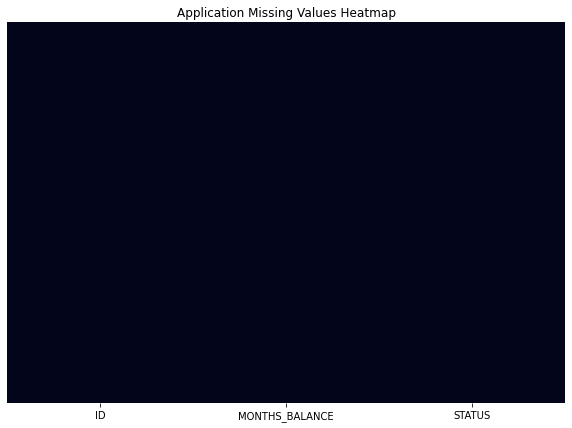

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64


In [7]:
#set figure size
plt.figure(figsize=(10,7))
#generate heatmap
sns.heatmap(CreditDF.isnull(), cbar=False)
#labels and titles
plt.title("Application Missing Values Heatmap")
plt.yticks([])
plt.show()
print(CreditDF.isnull().sum())

##### Checking for Duplicate values

We continue by checking for duplicate values in the Application Dataset starting  dropping the duplicates we found 

In [16]:
ApplicationDF = ApplicationDF.drop_duplicates('ID', keep='last')

#### ID's in both datasets 
We see that we have a vast diffrence in the unique id's in the datasets , we can only keep the ones present in both dt to use in our models . 

In [19]:
print("Unique Applicants " , len(pd.unique(ApplicationDF['ID'])))
print("Unique Applicants with credit scores" , len(pd.unique(CreditDF['ID'])))
print("ID's Present in both datasets" , len(set(ApplicationDF['ID']).intersection(set(CreditDF['ID']))))

Unique Applicants  438510
Unique Applicants with credit scores 45985
ID's Present in both datasets 36457


In [20]:
ApplicationDF[ApplicationDF['ID'].isin(ApplicationDF['ID'])]





,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,2.0
